In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [3]:
#load dataset with redundant features removed (see NBA_predictive_model.ipynb)
df_NBA_slim = pd.read_csv('NBA_numeric_slim.csv')
df_NBA_slim.head()

,season,age,w,sos,o_rtg,d_rtg,pace,f_tr,x3p_ar,ts_percent,...,away_orb_percent,away_opp_e_fg_percent,away_opp_tov_percent,away_opp_drb_percent,away_opp_ft_fga,away_attend,away_attend_g,home_score,away_score,spread
0,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,27.2,0.481,14.2,70.1,0.274,656081.0,16002.0,120,117,3
1,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,29.5,0.497,14.7,70.9,0.269,591701.0,14432.0,90,93,-3
2,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,28.4,0.454,14.4,72.6,0.262,828384.0,20204.0,105,114,-9
3,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,28.4,0.482,15.1,71.7,0.247,723949.0,17657.0,110,107,3
4,2005,26.0,13.0,0.09,100.6,111.1,91.4,0.299,0.146,0.504,...,31.2,0.461,13.5,73.0,0.207,905116.0,22076.0,68,95,-27


In [4]:
#create training and test sets
train_set_r, test_val_set_r = train_test_split(df_NBA_slim, test_size=0.2, 
                                       stratify=df_NBA_slim['season'], random_state=42)

#separate into data (X) and targets(y).  Remove "season" and 'home_score' and 'away_score'
X_train_r = train_set_r.iloc[:,1:-3]
y_train_r = train_set_r.iloc[:,-1]

#split test_val_set into test and validation sets
test_set_r, val_set_r = train_test_split(test_val_set_r, test_size=0.5, 
                                       stratify=test_val_set_r['season'], random_state=42)

X_test_r = test_set_r.iloc[:,1:-3]
y_test_r = test_set_r.iloc[:,-1]

X_val_r = val_set_r.iloc[:,1:-3]
y_val_r = val_set_r.iloc[:,-1]

In [5]:
#z-score normalize the data
ss = StandardScaler()

X_train_r_ss = ss.fit_transform(X_train_r)
X_test_r_ss = ss.transform(X_test_r)
X_val_r_ss = ss.transform(X_val_r)

In [ ]:
%%time
#grid search to optimize parameters

svr = SVR()
param_SVR = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2,3], 
             'gamma': ['scale','auto'], 'epsilon': [0.01, 0.1, 1, 10], 'C': [0.1, 1.0, 10]}]

grid_search_svr = GridSearchCV(svr, param_SVR, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

#oh my slow
"""{'C': 0.1, 'degree': 2, 'epsilon': 10, 'gamma': 'scale', 'kernel': 'linear'}
-12.212115945076476
CPU times: total: 6.66 s
Wall time: 33min 51s"""

In [ ]:
%%time
#grid search to optimize parameters

svr = SVR()
param_SVR = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2,3], 
             'gamma': ['scale','auto'], 'epsilon': [1, 10, 100, 1000], 'C': [0.01, 0.1, 1.0]}]

grid_search_svr = GridSearchCV(svr, param_SVR, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

"""{'C': 0.1, 'degree': 2, 'epsilon': 10, 'gamma': 'scale', 'kernel': 'linear'}
-12.212115945076476
CPU times: total: 4.48 s
Wall time: 10min 8s"""

In [ ]:
%%time
#grid search to optimize parameters

svr = SVR(kernel='linear', gamma='scale')
param_SVR = [{'epsilon': [5, 7, 10, 12, 15], 'C': [0.05, 0.07, 0.1, 0.12, 0.15]}]

grid_search_svr = GridSearchCV(svr, param_SVR, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

"""{'C': 0.05, 'epsilon': 15}
-12.205624343272454
CPU times: total: 1.39 s
Wall time: 1min 9s"""

In [6]:
%%time
#grid search to optimize parameters

svr = SVR(kernel='linear', gamma='scale')
param_SVR = [{'epsilon': [12, 15, 17, 20], 'C': [0.01, 0.03, 0.05, 0.07]}]

grid_search_svr = GridSearchCV(svr, param_SVR, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train_r_ss, y_train_r)
print(grid_search_svr.best_params_)
print(grid_search_svr.best_score_)

"""{'C': 0.05, 'epsilon': 17}
-12.204289448494757
CPU times: total: 1.42 s
Wall time: 30.4 s"""

{'C': 0.05, 'epsilon': 17}
-12.204289448494757
CPU times: total: 1.42 s
Wall time: 30.4 s


In [6]:
#predict for validation set and evaluate using RMSE
svr_op = SVR(kernel='linear', gamma='scale', epsilon=17, C=0.05)

svr_op.fit(X_train_r_ss, y_train_r)
y_hat_svr = svr_op.predict(X_val_r_ss)
print('RMSE = ', mean_squared_error(y_val_r, y_hat_svr, squared = False))
#better than KNN (RMSE = 12.45) with same data.  Dummy (RMSE = 13.3)

RMSE =  12.28369216756171


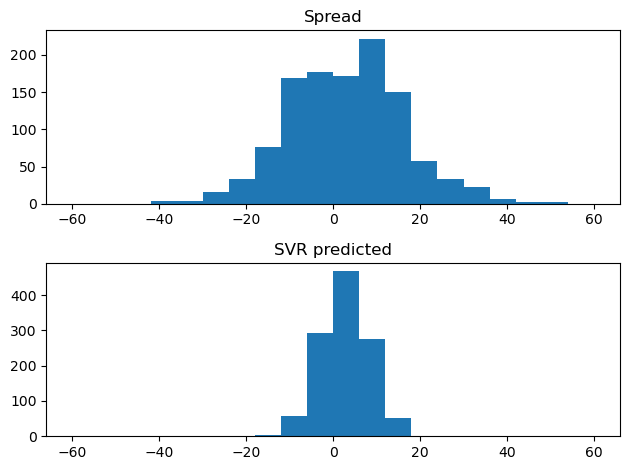

In [7]:
#plot histograms of predictions and target values
fig, axs = plt.subplots(2,1)

axs[0].set_title('Spread')
axs[0].hist(y_val_r, bins=20, range = (-60,60))

axs[1].set_title('SVR predicted')
axs[1].hist(y_hat_svr, bins=20, range =(-60,60))

fig.tight_layout()
plt.show()

#distribution of predictions is still quite narrow.  However, it is wider than for the KNN models

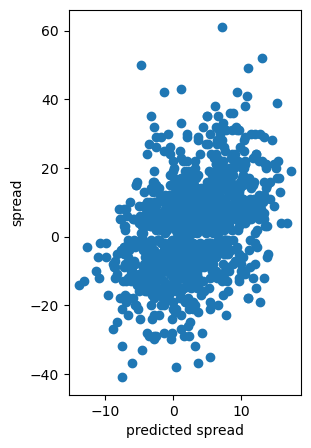

In [8]:
#plot targets vs. predictions on a scatter plot
plt.figure(figsize=(3, 5))
plt.xlabel('predicted spread')
plt.ylabel('spread')
plt.scatter(y_hat_svr, y_val_r)
plt.show()

#does not visually look that different than KNN plots

In [9]:
#KNN neighbor model for plotting comparison

knn_80 = KNeighborsRegressor(n_neighbors = 80, weights = 'distance')
knn_80.fit(X_train_r_ss, y_train_r)
y_hat_knn_80 = knn_80.predict(X_val_r_ss)

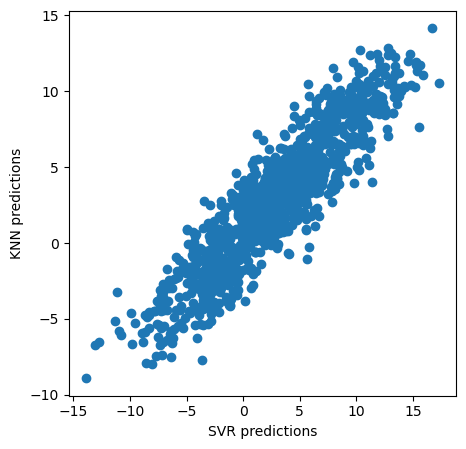

In [10]:
#Scatter plot of knn vs svr predictions

plt.figure(figsize=(5, 5))
plt.xlabel('SVR predictions')
plt.ylabel('KNN predictions')
plt.scatter(y_hat_svr, y_hat_knn_80)
plt.show()


In [10]:
#compare to RandomForestRegressor optimized in NBA_Prediction_RFR.ipynb

rfr = RandomForestRegressor(max_depth =7, criterion='squared_error', min_samples_leaf = 8)
rfr.fit(X_train_r_ss, y_train_r)
y_hat_rfr = rfr.predict(X_val_r_ss)
print('RMSE = ', mean_squared_error(y_val_r, y_hat_rfr, squared = False))


RMSE =  12.31449995041305


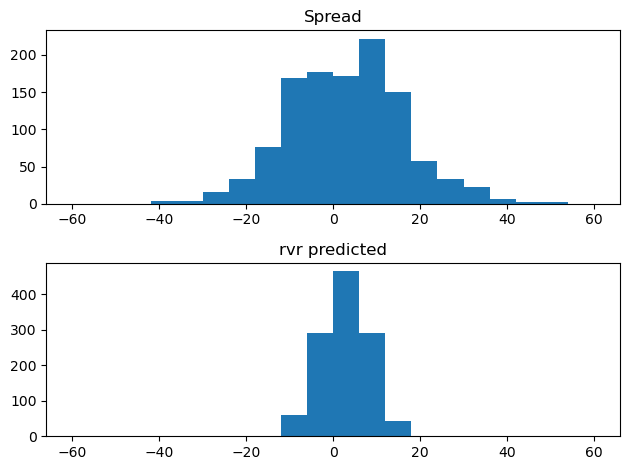

In [12]:
#plot histograms of predictions and target values to compare distribution
fig, axs = plt.subplots(2,1)

axs[0].set_title('Spread')
axs[0].hist(y_val_r, bins=20, range = (-60,60))

axs[1].set_title('rvr predicted')
axs[1].hist(y_hat_rfr, bins=20, range =(-60,60))

fig.tight_layout()
plt.show()

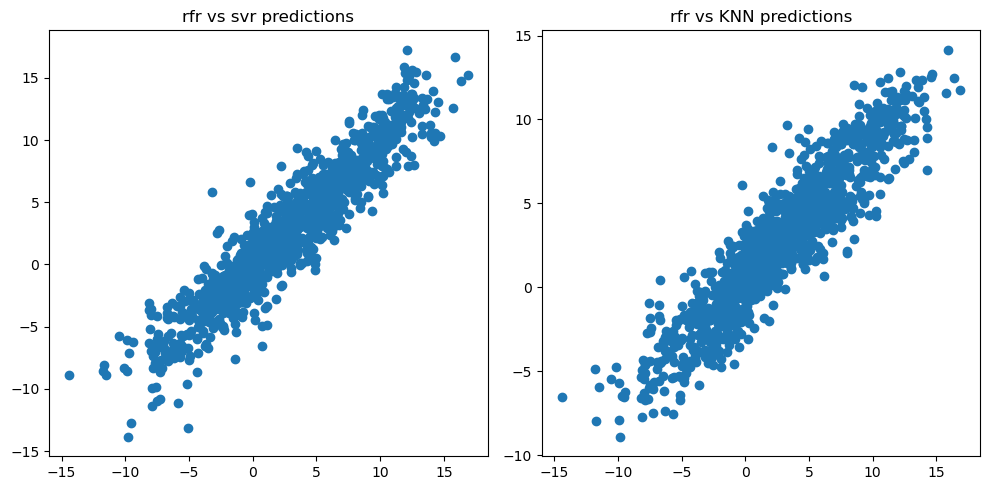

In [18]:
#plot vs KNN and SVR to compare the similarity in predictions

#plot histograms of predictions and target values to compare distribution

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].set_title('rfr vs svr predictions')
axs[0].scatter(y_hat_rfr, y_hat_svr)

axs[1].set_title('rfr vs KNN predictions')
axs[1].scatter(y_hat_rfr, y_hat_knn_80)

fig.tight_layout()
plt.show()

In [33]:
#try a voting regressor

voting = VotingRegressor([('svr', svr_op), ('KNN', knn_80), ('rfr', rfr)])

voting.fit(X_train_r_ss, y_train_r)
y_hat_vot = voting.predict(X_val_r_ss)
print('RMSE = ', mean_squared_error(y_val_r, y_hat_vot, squared = False))

#a little worse than SVM alone, which matches my previous experience with voting classifiers (this is a regressor)
# it seems to me that the more models you add to this, the closer you will get to the mean
#RMSE =  12.287190153295354

RMSE =  12.29280015473165


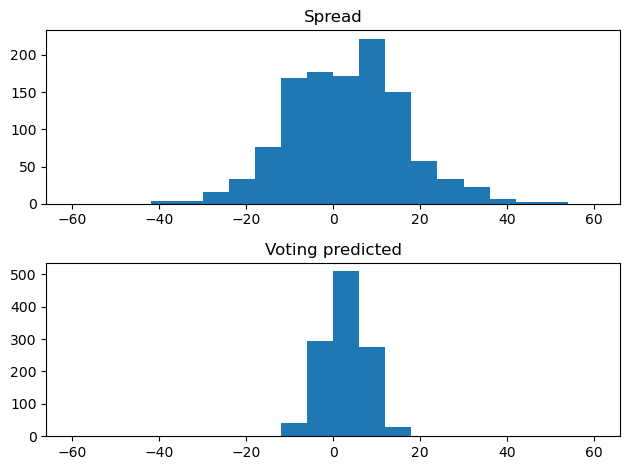

In [22]:
#plotting to see if voting made the distribution of results more narrow

#plot histograms of predictions and target values to compare distribution
fig, axs = plt.subplots(2,1)

axs[0].set_title('Spread')
axs[0].hist(y_val_r, bins=20, range = (-60,60))

axs[1].set_title('Voting predicted')
axs[1].hist(y_hat_vot, bins=20, range =(-60,60))

fig.tight_layout()
plt.show()

#the distribution isn't obviously different than the individual methods

In [35]:
#How about a stacking classifier
sgd_reg = SGDRegressor(random_state=42)
st_reg = StackingRegressor(estimators=[('svr', svr_op), ('KNN', knn_80), ('rfr', rfr)],final_estimator= sgd_reg)

st_reg.fit(X_train_r_ss, y_train_r)
y_hat_st = st_reg.predict(X_val_r_ss)
print('RMSE = ', mean_squared_error(y_val_r, y_hat_st, squared = False))

#RMSE =  12.27357814495879



RMSE =  12.282981164499054
